In [1]:
!pip install tweet-preprocessor

In [2]:

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# nltk.download('punkt')
nltk.download('stopwords')

# Sklearn Imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing Imports
import re
import preprocessor as p
from gensim.parsing.preprocessing import remove_stopwords
import pandas as pd
import numpy as np

# Visulisation Imports
import matplotlib.pyplot as plt
import seaborn as sns




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_original = pd.read_csv('https://raw.githubusercontent.com/QuestIT-Cell/Understanding-Machine-Learning-2022/main/Day%202/data-twitter-1.csv')
df_original.count()



target    30000
ids       30000
date      30000
flag      30000
user      30000
text      30000
dtype: int64

In [4]:
df_original.head()

,target,ids,date,flag,user,text
0,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
1,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
2,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
4,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [5]:
df = df_original[['target','text']]
df.target.unique()

del df_original

In [6]:
df = df.dropna()
df = df.drop_duplicates(subset='text')
y=df['target']
df.drop(['target'],inplace=True,axis=1)

In [7]:
def preprocess_text(row):
    text = row['text']
    # print(text)
    text = p.clean(text)
    return text

def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

df['text'] = df.apply(stopword_removal, axis=1)
df['text'] = df.apply(preprocess_text, axis=1)
df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
df

,text
0,i love u guys r best
1,im meeting besties tonight cant wait girl talk
2,thanks twitter add sunisa i got meet hin dc ar...
3,being sick cheap hurts eat real food plus frie...
4,effect
...,...
29995,hey aubrey how ya what ya dk split
29996,twaiting wife come stairs knock tivo she leave...
29997,yer hgistory presetnation
29998,miss talking missy


In [9]:
df['text'] = df['text'].apply(word_tokenize)

In [10]:
df.head()

,text
0,"[i, love, u, guys, r, best]"
1,"[im, meeting, besties, tonight, cant, wait, gi..."
2,"[thanks, twitter, add, sunisa, i, got, meet, h..."
3,"[being, sick, cheap, hurts, eat, real, food, p..."
4,[effect]


In [11]:
stemmer = PorterStemmer()
def stem_words(text):       
    return " ".join([stemmer.stem(word) for word in text])
df['text'] = df['text'].apply(lambda text: stem_words(text))

del stemmer

In [12]:
bow=CountVectorizer()
bow.fit(df['text'])
text_processed = bow.transform(df['text']).toarray()

print(text_processed)

# del bow
del df

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(text_processed, y, test_size=0.3)

del text_processed 
del y
del train_test_split

In [14]:
def plot_heatmap(y_pred , y_test):
  cf_matrix = confusion_matrix(y_test, y_pred)
  ax= plt.subplot()
  #annot=True to annotate cells
  sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
  # labels, title and ticks
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


In [15]:
# logistic = LogisticRegression()
# logistic.fit(X_train, y_train)
# y_pred = logistic.predict(X_test)
# print("Accuracy : ",accuracy_score(y_pred,y_test)*100)
# plot_heatmap(y_pred,y_test)

Accuracy :  73.267879058351


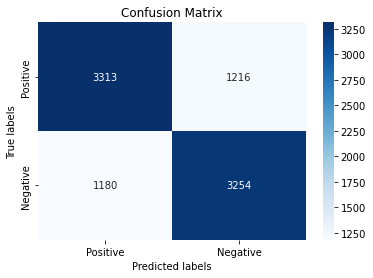

In [17]:
mnd = MultinomialNB().fit(X_train,y_train)
y_pred = mnd.predict(X_test)
print("Accuracy : ",accuracy_score(y_pred,y_test)*100)
plot_heatmap(y_pred,y_test)

In [20]:

text_pos = "Hey bro, you guys are awesome! Enjoying a lot! Enjoy"
text_neg = "I am fed up and sad, you idiots."
text = remove_stopwords(text_pos)
text = p.clean(text)
text = word_tokenize(text)
stemmer = PorterStemmer()
print(text )
text = stem_words(text)
print(text)
x = bow.transform([text]).toarray()
print(mnd.predict(x))

['Hey', 'bro', ',', 'guys', 'awesome', '!', 'Enjoying', 'lot', '!', 'Enjoy']
hey bro , guy awesom ! enjoy lot ! enjoy
[4]
